In [1]:
### This module uses Stacked LSTM 50 units and 100 epochs to predict Google stock prices from Yahoo Finance, epochs = 100
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
### import training set
dataset=pd.read_csv('GOOG.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/1/2012,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,4/1/2012,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,5/1/2012,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,6/1/2012,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,9/1/2012,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


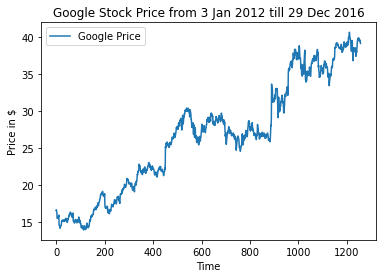

In [3]:
p=dataset.iloc[0:1259,4:5]
plt.plot(p,label="Google Price",linestyle='-')
plt.title('Google Stock Price from 3 Jan 2012 till 29 Dec 2016')
plt.xlabel('Time')
plt.ylabel('Price in $')
plt.legend()
plt.show()

In [4]:
training_set=dataset.iloc[0:1100,4:5].values ### keeps the Adj Close prices
trgsset=pd.DataFrame(training_set)

test_set=dataset.iloc[1100:1259,4:5].values
tstset=pd.DataFrame(test_set)

print(dataset.shape, trgsset.shape, tstset.shape)
print(trgsset.head(),trgsset.tail(), tstset.head(),tstset.tail())

(1257, 7) (1100, 1) (157, 1)
           0
0  16.573130
1  16.644611
2  16.413727
3  16.189817
4  15.503389               0
1095  35.764500
1096  35.665501
1097  35.541500
1098  35.824501
1099  35.311501            0
0  35.331501
1  35.015999
2  35.487000
3  35.212002
4  36.004501              0
152  39.563000
153  39.495499
154  39.577499
155  39.252499
156  39.139500


In [5]:
### Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)
type(training_set_scaled), type(test_set_scaled), 

(numpy.ndarray, numpy.ndarray)

In [6]:
print(len(training_set_scaled), training_set_scaled)

1100 [[0.10636301]
 [0.10923305]
 [0.09996281]
 ...
 [0.86796316]
 [0.87932595]
 [0.85872846]]


In [7]:
### creating data structure with 60 time-steps and 1 output
X_train=[]
y_train=[]
for i in range(60,1100):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)   
print(X_train.shape, y_train.shape)
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1)) 
### this step converts X_train to 3D from (1040,60) to (1040,60,1) for input to the keras app

(1040, 60) (1040,)


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
### Initializing RNN
model = Sequential()

In [10]:
### Add first LSTM layer and add Dropout Reegularization
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1))) ### Sequential reads input as 3D
model.add(Dropout(0.2))
### add return_sequences=True for all LSTM layers except the last one. Setting this flag to True lets Keras know that 
### LSTM output should contain all historical generated outputs along with time stamps (3D). So, next LSTM layer can work 
### further on the data. If this flag is false, then LSTM only returns last output (2D). Such output is not good enough 
### for another LSTM layer.

In [11]:
### Add second LSTM layer and Dropout
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [12]:
### Add third LSTM layer and Dropout
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [13]:
### Add fourth LSTM layer and Dropout
model.add(LSTM(units=50)) ### note: last LSTM layer does not carry argument 'return_sequences=True'
model.add(Dropout(0.2))

In [14]:
### Add output layer
model.add(Dense(units=1))  ### not capital "U"nit

In [15]:
### Compiling the RNN
model.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
### Run the training set with the LSTM (specialized RNN here)
model.fit(X_train,y_train,epochs=100,batch_size=10)

Epoch 1/100
104/104 [==============================] - 5s 20ms/step - loss: 0.0199
Epoch 2/100
104/104 [==============================] - 2s 20ms/step - loss: 0.0066
Epoch 3/100
104/104 [==============================] - 2s 21ms/step - loss: 0.0058
Epoch 4/100
104/104 [==============================] - 2s 20ms/step - loss: 0.0050
Epoch 5/100
104/104 [==============================] - 2s 20ms/step - loss: 0.0050
Epoch 6/100
104/104 [==============================] - 2s 20ms/step - loss: 0.0045
Epoch 7/100
104/104 [==============================] - 2s 20ms/step - loss: 0.0046
Epoch 8/100
104/104 [==============================] - 2s 20ms/step - loss: 0.0038
Epoch 9/100
104/104 [==============================] - 2s 20ms/step - loss: 0.0041
Epoch 10/100
104/104 [==============================] - 2s 20ms/step - loss: 0.0035
Epoch 11/100
104/104 [==============================] - 2s 21ms/step - loss: 0.0036
Epoch 12/100
104/104 [==============================] - 2s 20ms/step - loss: 0.0032
E

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [18]:
predict_train=model.predict(X_train) 
print(predict_train.shape) 
### this output is (1040,60,1), we want only the first no. in each row of 1040 
### this 3D structure makes it more difficult to interpret comparison of prediction in training set vs output in trg set

33/33 [==============================] - 1s 12ms/step
(1040, 1)


In [19]:
print(predict_train)

[[0.11048877]
 [0.11068454]
 [0.10711372]
 ...
 [0.87018967]
 [0.8678323 ]
 [0.87677455]]


In [20]:
predict_train=predict_train[:, 0]  ### select first column or first day of 60 days of each day prediction from 1 to 1040

In [21]:
print(predict_train)

[0.11048877 0.11068454 0.10711372 ... 0.87018967 0.8678323  0.87677455]


In [22]:
### creating data structure with 60 time-steps and 1 output
X_test=[]
y_test=[]  ### here y_test is to collect the predicted y values
for i in range(60,157):
    X_test.append(test_set_scaled[i-60:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)  ### convert to np arrays as X_test is "list"    
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [23]:
y_test.shape ### now (97.) is 1 Dim -- convert to two dim

(97,)

In [24]:
y_test = np.reshape(y_test, (-1, 1))
y_train=np.reshape(y_train,(-1,1))

In [25]:
### Prediction
predicted_stock_price=model.predict(X_test)
predicted_stock_price=predicted_stock_price[:,0]
#predicted_stock_price1=sc.inverse_transform(predicted_stock_price)
#predicted_stock_price.shape

4/4 [==============================] - 0s 9ms/step


In [26]:
print(predicted_stock_price)

[0.99890614 0.99694437 0.9964469  0.98937505 0.99387527 0.9919386
 0.98753715 0.9830254  0.9834373  0.9800555  0.9788041  0.97926074
 0.98307276 0.9780225  0.9736108  0.9769389  0.98151976 0.9941009
 0.99419826 0.98455894 0.96126443 0.97570664 0.9656535  0.9643751
 0.9814     0.9774989  0.96912545 0.9793935  0.9889848  1.0041466
 1.0028914  0.98171574 0.99622875 0.99882716 0.9846092  0.9880116
 0.9841878  0.98862904 0.9897936  0.989514   0.98692065 1.0042396
 1.0006583  1.0020566  0.99175197 0.9916624  0.99585915 1.0196462
 1.0289098  1.0180912  1.022585   1.0483813  1.037884   1.020745
 1.0192832  1.0227144  1.0051658  1.002315   0.9830796  0.97098875
 0.9724016  1.0050851  1.0165391  1.0020989  0.96745926 0.9549704
 0.93135506 0.961117   0.97514933 0.978436   0.961501   0.97451293
 0.9771443  0.96191764 0.96163124 0.9748846  0.97860944 0.9566184
 0.9397932  0.9462878  0.96718454 0.9601983  0.97520477 0.9874964
 1.0057967  1.0050197  1.0140419  1.0178921  1.0183394  1.0080271
 1.01431

In [27]:
from sklearn.metrics import mean_squared_error
import math
def print_error(trainY, testY, train_predict, test_predict):    
    ### Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    ### Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))
    
print_error(y_train, y_test, predict_train, predicted_stock_price)

Train RMSE: 0.020 RMSE
Test RMSE: 0.019 RMSE


In [28]:
print(y_train)

[[0.08936253]
 [0.08219231]
 [0.08787248]
 ...
 [0.86796316]
 [0.87932595]
 [0.85872846]]


In [29]:
print(predict_train)

[0.11048877 0.11068454 0.10711372 ... 0.87018967 0.8678323  0.87677455]


In [30]:
print(y_test)

[[1.01328988]
 [1.01172411]
 [1.00108392]
 [1.00664488]
 [1.00180672]
 [0.99763101]
 [0.99106623]
 [0.99092578]
 [0.98602727]
 [0.98556565]
 [0.98582664]
 [0.99106623]
 [0.98492312]
 [0.98082783]
 [0.98430082]
 [0.98968118]
 [1.00698628]
 [1.00752832]
 [0.99743021]
 [0.96599205]
 [0.98478267]
 [0.96605224]
 [0.97167335]
 [0.9902834 ]
 [0.98450161]
 [0.97811759]
 [0.98958068]
 [0.99923709]
 [1.02130006]
 [1.02067776]
 [0.99520183]
 [1.01286837]
 [1.00995734]
 [0.99680791]
 [1.00138505]
 [0.99188933]
 [0.9996586 ]
 [0.99973902]
 [1.00052184]
 [0.99694852]
 [1.0187505 ]
 [1.01298879]
 [1.01915193]
 [1.00319193]
 [1.00387442]
 [1.00674534]
 [1.03746086]
 [1.04998803]
 [1.04089373]
 [1.04571182]
 [1.07329564]
 [1.06237455]
 [1.04510959]
 [1.03764162]
 [1.03768173]
 [1.01593993]
 [1.01407287]
 [0.98414029]
 [0.97095059]
 [0.97072988]
 [1.01188459]
 [1.02792502]
 [1.01748567]
 [0.9718138 ]
 [0.95466937]
 [0.91865391]
 [0.96364314]
 [0.97566834]
 [0.9892194 ]
 [0.96775862]
 [0.98514399]
 [0.98

In [31]:
print(predicted_stock_price)

[0.99890614 0.99694437 0.9964469  0.98937505 0.99387527 0.9919386
 0.98753715 0.9830254  0.9834373  0.9800555  0.9788041  0.97926074
 0.98307276 0.9780225  0.9736108  0.9769389  0.98151976 0.9941009
 0.99419826 0.98455894 0.96126443 0.97570664 0.9656535  0.9643751
 0.9814     0.9774989  0.96912545 0.9793935  0.9889848  1.0041466
 1.0028914  0.98171574 0.99622875 0.99882716 0.9846092  0.9880116
 0.9841878  0.98862904 0.9897936  0.989514   0.98692065 1.0042396
 1.0006583  1.0020566  0.99175197 0.9916624  0.99585915 1.0196462
 1.0289098  1.0180912  1.022585   1.0483813  1.037884   1.020745
 1.0192832  1.0227144  1.0051658  1.002315   0.9830796  0.97098875
 0.9724016  1.0050851  1.0165391  1.0020989  0.96745926 0.9549704
 0.93135506 0.961117   0.97514933 0.978436   0.961501   0.97451293
 0.9771443  0.96191764 0.96163124 0.9748846  0.97860944 0.9566184
 0.9397932  0.9462878  0.96718454 0.9601983  0.97520477 0.9874964
 1.0057967  1.0050197  1.0140419  1.0178921  1.0183394  1.0080271
 1.01431

In [32]:
Pred_price=sc.inverse_transform(predicted_stock_price.reshape(-1, 1))
#Pred_price=Pred.price.reshape(-1, 1)

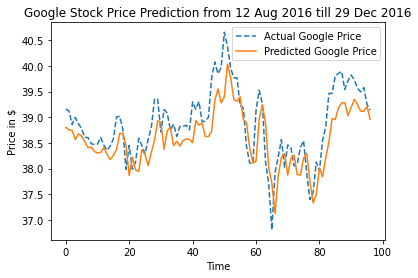

In [33]:
### Plotting the stock price prediction results
plt.plot(test_set[60:157,:],label="Actual Google Price",linestyle='--') ### from observation 60 to 157  or 12 Aug 2016 to 30 Dec 2016
plt.plot(Pred_price,label="Predicted Google Price",linestyle='-')
plt.title('Google Stock Price Prediction from 12 Aug 2016 till 29 Dec 2016')
plt.xlabel('Time')
plt.ylabel('Price in $')
plt.legend()
plt.show()